Notebook created to display plots of useful summary information from MgII catalogs.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os

import desispec.io
import fitsio
from desispec.coaddition import coadd_cameras
from desimodel.footprint import radec2pix
from scipy.signal import medfilt

from IPython.display import clear_output

#import common functions
%run /global/u2/l/lucasnap/git/QSO_AB/QSO_AB_CmnFns.py

#Write main catalog and physically impossible catalog
redux='fuji'
ndim=7
Mgii_fp = '/global/cfs/cdirs/desi/users/lucasnap/MgII-Absorbers-fuji-nocuts.fits'


plt.rcParams.update({'font.size': 20})

MgII_cat_units = ['',"deg","deg",'','','','','','','angstrom','angstrom','angstrom','angstrom','angstrom','angstrom','','1e-17 erg / (Angstrom cm2 s)','1e-17 erg / (Angstrom cm2 s)','angstrom','angstrom','','1e-17 erg / (Angstrom cm2 s)','1e-17 erg / (Angstrom cm2 s)','angstrom','angstrom','','1e-17 erg / (Angstrom cm2 s)','1e-17 erg / (Angstrom cm2 s)','angstrom','angstrom','','','']

In [9]:
#open MgII abs summary cat
MgII_cat = fitsio.read(Mgii_fp,'MGII_ABSORBERS')

MgII_cat = purity_cuts(MgII_cat,PIA_cut=False)

zdop = (MgII_cat['Z_MGII']-MgII_cat['Z_QSO'])/(1+MgII_cat['Z_QSO'])

#seperate into physically possible and physically impossible systems
main_cat = MgII_cat[zdop < (5000/300000)]
main_cat_fp = Mgii_fp.replace("nocuts","pure")
print('{} physically possible catalog entries after purity cuts'.format(len(main_cat)))

PI_cat = MgII_cat[zdop > (5000/300000)]
PI_cat_fp = Mgii_fp.replace("nocuts","PI")
print('{} physically impossible catalog entries after purity cuts'.format(len(PI_cat)))

#write catalogs
if os.path.exists(main_cat_fp):
    print('Removing old physically possible catalog')
    os.remove(main_cat_fp)
fitsio.write(main_cat_fp,main_cat,extname='MGII_ABSORBERS',units=MgII_cat_units)
print('Physically possible catalog written to: {}'.format(main_cat_fp))
    
if os.path.exists(PI_cat_fp):
    print('Removing old physically impossible catalog')
    os.remove(PI_cat_fp)
fitsio.write(PI_cat_fp,PI_cat,extname='MGII_ABSORBERS',units=MgII_cat_units)
print('Physically impossible catalog written to: {}'.format(PI_cat_fp))

32164
Result of Positive Amplitude Cuts: 2244 systems removed
Result of Elliptical Cuts: 5131 systems removed
Result of Purity Cuts: 7375 systems removed of initial 32164

23776 physically possible catalog entries after purity cuts
1013 physically impossible catalog entries after purity cuts
Physically possible catalog written to: /global/cfs/cdirs/desi/users/lucasnap/MgII-Absorbers-fuji-pure.fits
Physically impossible catalog written to: /global/cfs/cdirs/desi/users/lucasnap/MgII-Absorbers-fuji-PI.fits


In [7]:
if write_pure:
    if os.path.exists(Mgii_fp.replace("nocuts","pure")):
        os.remove(Mgii_fp.replace("nocuts","pure"))
    fitsio.write(Mgii_fp.replace("nocuts","pure"),MgII_cat,extname='MGII_ABSORBERS',units=MgII_cat_units)

87318 total QSOs
Removing 1547 physically impossible absorption systems
30617
Result of Positive Amplitude Cuts: 2008 systems removed
Result of Elliptical Cuts: 4833 systems removed
Result of Purity Cuts: 6841 systems removed of initial 30617

Total number of QSO spectra searched: 87318
Total number of MgII absorption systems detected: 23776
Total number of QSO spectra with MgII absorbers: 16304
Percentage of QSO spectra with MgII absorbers: 18.67198057674248%
Expected number of MgII absorbers per QSO spectra: 0.2722920818158913


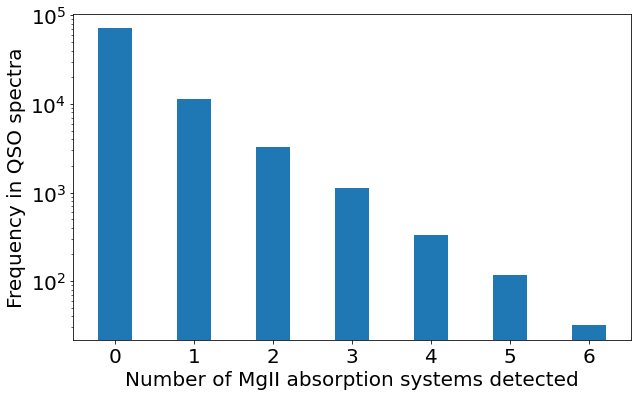

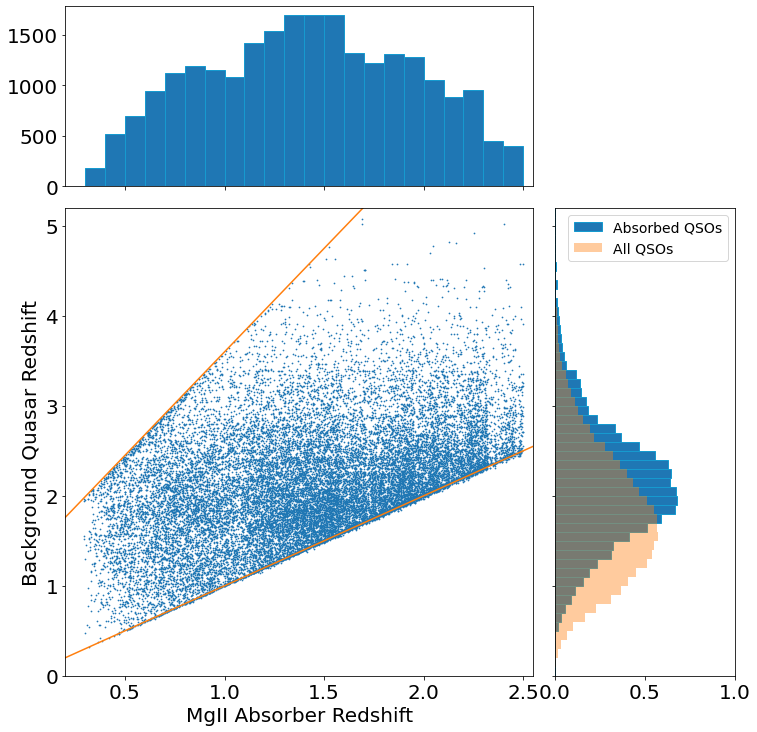

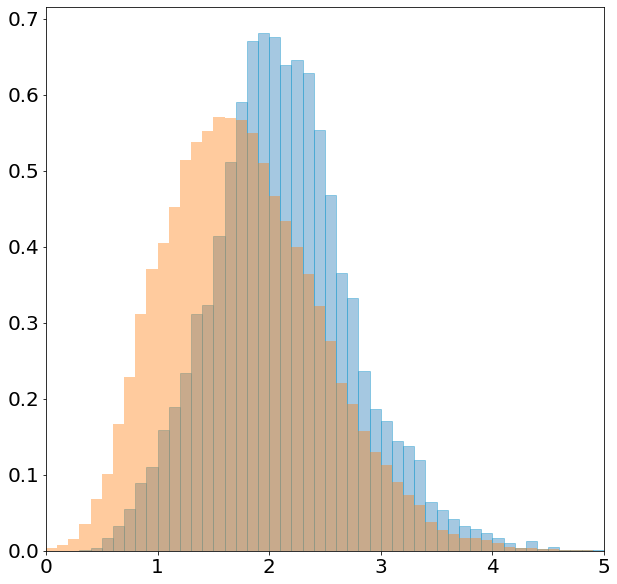

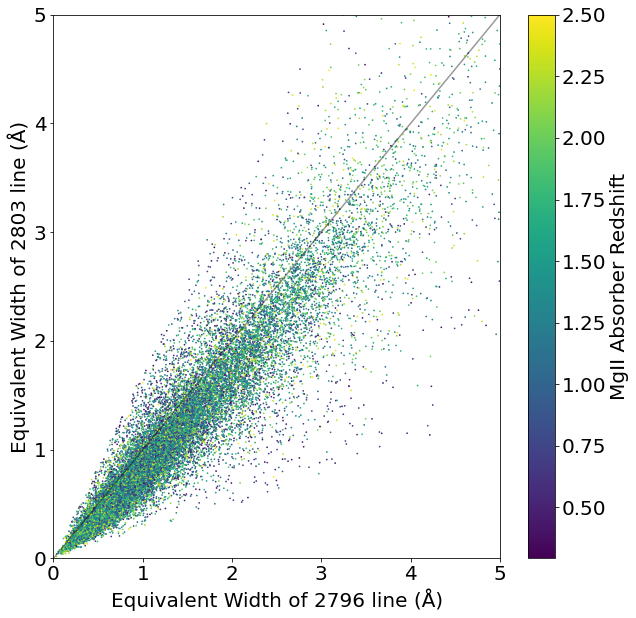

In [7]:
reduction_base_dir='/global/cfs/cdirs/desi/spectro/redux/{}/'.format(redux)

#getting all qso redshifts
QSOcat_fp = '/global/cfs/cdirs/desi/users/edmondc/QSO_catalog/{}/QSO_cat_{}_healpix_only_qso_targets.fits'.format(redux,redux)
#QSOcat_fp='/global/cfs/cdirs/desi/users/edmondc/QSO_catalog/{}/QSO_cat_{}_healpix_for_lyalpha.fits'.format(redux,redux)
#QSOcat_fp='/global/cfs/cdirs/desi/users/edmondc/QSO_catalog/{}/QSO_cat_fuji_healpix.fits'.format(redux)

QSOcat=fitsio.read(QSOcat_fp,'QSO_CAT')
print('{} total QSOs'.format(len(QSOcat)))

QSO_cat_allz=QSOcat['Z']


plt.rcParams.update({'font.size': 20})

#open MgII abs summary cat
MgII_cat = fitsio.read(Mgii_fp,'MGII_ABSORBERS')

MgII_cat = purity_cuts(MgII_cat)

MgII_abs_unique_targetid, MgII_abs_counts = np.unique(MgII_cat['TARGETID'], return_counts=True)

#
print('Total number of QSO spectra searched: {}'.format(len(QSO_cat_allz)))
print('Total number of MgII absorption systems detected: {}'.format(len(MgII_cat)))

print('Total number of QSO spectra with MgII absorbers: {}'.format(len(MgII_abs_unique_targetid)))
print('Percentage of QSO spectra with MgII absorbers: {}%'.format(100*len(MgII_abs_unique_targetid)/len(QSO_cat_allz)))
print('Expected number of MgII absorbers per QSO spectra: {}'.format(len(MgII_cat)/len(QSO_cat_allz)))

plt.figure(figsize=(10,6))
plt.hist(MgII_abs_counts,rwidth=0.85,log=True,bins=np.arange(0,7,0.5),align='left')
plt.hist(x=np.zeros(len(QSO_cat_allz)-len(MgII_abs_unique_targetid)),rwidth=0.85,color='C00',bins=np.arange(0,7,0.5),align='left')
plt.xlabel('Number of MgII absorption systems detected')
plt.ylabel('Frequency in QSO spectra')
plt.show()

#all from https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html
#spacing /location stuff of plot elements
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.03

right_plot_width=1.0

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.25]
rect_histy = [left + width + spacing, bottom, 0.25, height]

fig = plt.figure(figsize=(10,10))

#add axes
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)

ax_histy = fig.add_axes(rect_histy, sharey=ax)

#disable overlapping axis labels
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

#main plot
ax.scatter(MgII_cat['Z_MGII'],MgII_cat['Z_QSO'],s=0.5)
x=np.arange(0,2.6,0.01)
ax.plot(x,x,c='C01')
ax.plot(x,(x+1)*first_line_wave/1216-1,c='C01')

ax.set_ylabel('Background Quasar Redshift')
ax.set_xlabel('MgII Absorber Redshift')
ax.set_ylim(0,5.2)
ax.set_xlim(0.2,2.55)

#Histogram setup
binwidth = 0.1
xymax = max(np.max(np.abs(MgII_cat['Z_MGII'])), np.max(np.abs(MgII_cat['Z_QSO'])))
lim = (int(xymax/binwidth) + 1) * binwidth
bins = np.arange(-lim, lim + binwidth, binwidth)

#Adding histograms
ax_histx.hist(MgII_cat['Z_MGII'], bins=bins, edgecolor='#169acf')
ax_histy.hist(MgII_cat['Z_QSO'], bins=bins, orientation='horizontal', edgecolor='#169acf',density=True,label='Absorbed QSOs')
ax_histy.hist(QSO_cat_allz,alpha=0.4,density=True,bins=bins,label='All QSOs',orientation='horizontal')
ax_histy.legend(fontsize=14)

#replacing histogram labels to avoid overlapping #s
#ax_histx.set_yticks([0,250,500])
#ax_histx.set_yticklabels(['','250','500'])

ax_histy.set_xticks([0,0.5,1])
#ax_histy.set_xticklabels(['','250','500'])

plt.show()

plt.figure(figsize=(10,10))
plt.hist(MgII_cat['Z_QSO'],bins=bins,edgecolor='#169acf',alpha=0.4,density=True)
plt.hist(QSO_cat_allz,alpha=0.4,density=True,bins=bins)

plt.xlim(0,5)
plt.show()

#plt.figure(figsize=(10,10))
#plt.scatter(MgII_cat['TSNR2'],MgII_cat['EW_2796'],s=0.5)
#plt.xlabel('FLUX_R')
#plt.ylabel('EW_2796')
#plt.xlim(-1,100)
#plt.ylim(-1,20)
#plt.show()

#plt.figure(figsize=(10,10))
#plt.scatter(MgII_cat['AMP_2796']/MgII_cat['AMP_2803'],MgII_cat['STDDEV_2796']/MgII_cat['STDDEV_2803'],s=0.5)
#plt.xlabel('Line Amplitude Ratio')
#plt.ylabel('Line Width Ratio')
#plt.xlim(-1,4)
#plt.ylim(0,4)
#plt.show()


plt.figure(figsize=(10,10))

x=np.arange(0,8,0.01)
plt.plot(x,x,c='black',alpha=0.4)

plt.scatter(MgII_cat['EW_2796'],MgII_cat['EW_2803'],s=0.5,c=MgII_cat['Z_MGII'])
plt.colorbar(label='MgII Absorber Redshift')
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('Equivalent Width of 2796 line (Å)')
plt.ylabel('Equivalent Width of 2803 line (Å)')
plt.show()

1.1892383851181416


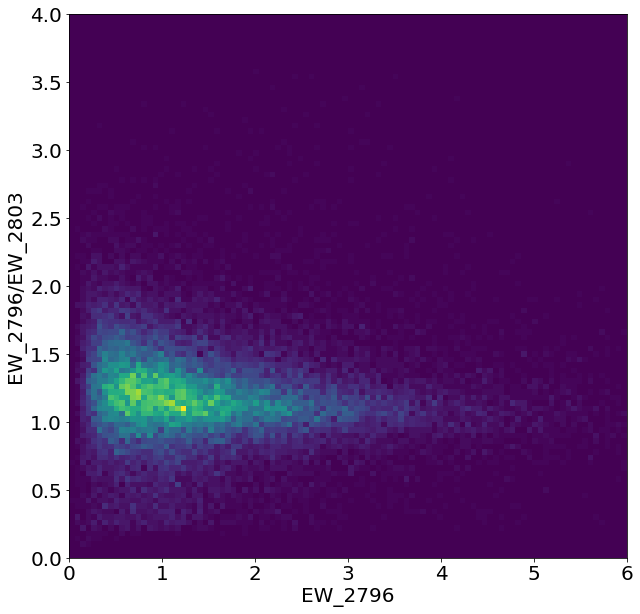

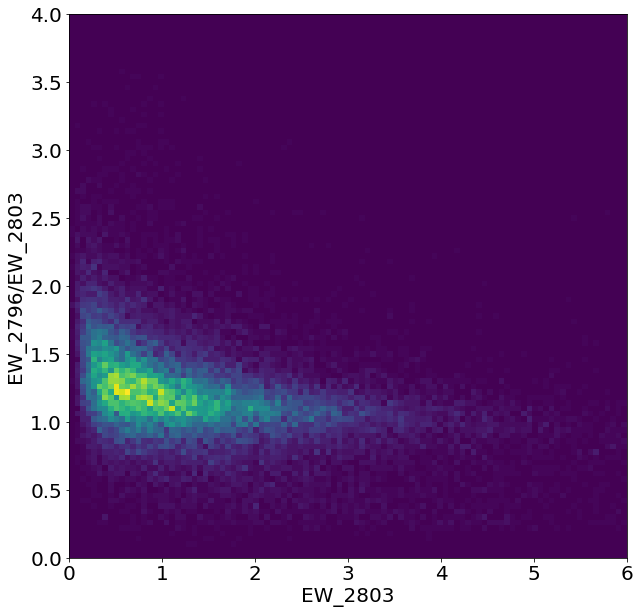

In [6]:
redux='fuji'
reduction_base_dir='/global/cfs/cdirs/desi/spectro/redux/{}/'.format(redux)

Mgii_fp='/global/cfs/cdirs/desi/users/lucasnap/MgII-Absorber-Catalog-{}/v1.0/MgII-Absorbers-fuji.fits'.format(redux)

#open MgII abs summary cat
MgII_cat=fitsio.read(Mgii_fp,'MGII_ABSORBERS')

print(np.mean(MgII_cat['EW_2796']/MgII_cat['EW_2803']))


plt.figure(figsize=(10,10))
plt.hist2d(MgII_cat['EW_2796'],MgII_cat['EW_2796']/MgII_cat['EW_2803'],range=[[0,6],[0,4]],bins=100)
plt.xlabel('EW_2796')
plt.ylabel('EW_2796/EW_2803')
plt.show()

plt.figure(figsize=(10,10))
plt.hist2d(MgII_cat['EW_2803'],MgII_cat['EW_2796']/MgII_cat['EW_2803'],range=[[0,6],[0,4]],bins=100)
plt.xlabel('EW_2803')
plt.ylabel('EW_2796/EW_2803')
plt.show()

INFO:spectra.py:291:read_spectra: iotime 3.649 sec to read coadd-sv3-dark-25955.fits at 2023-01-05T11:19:21.326059


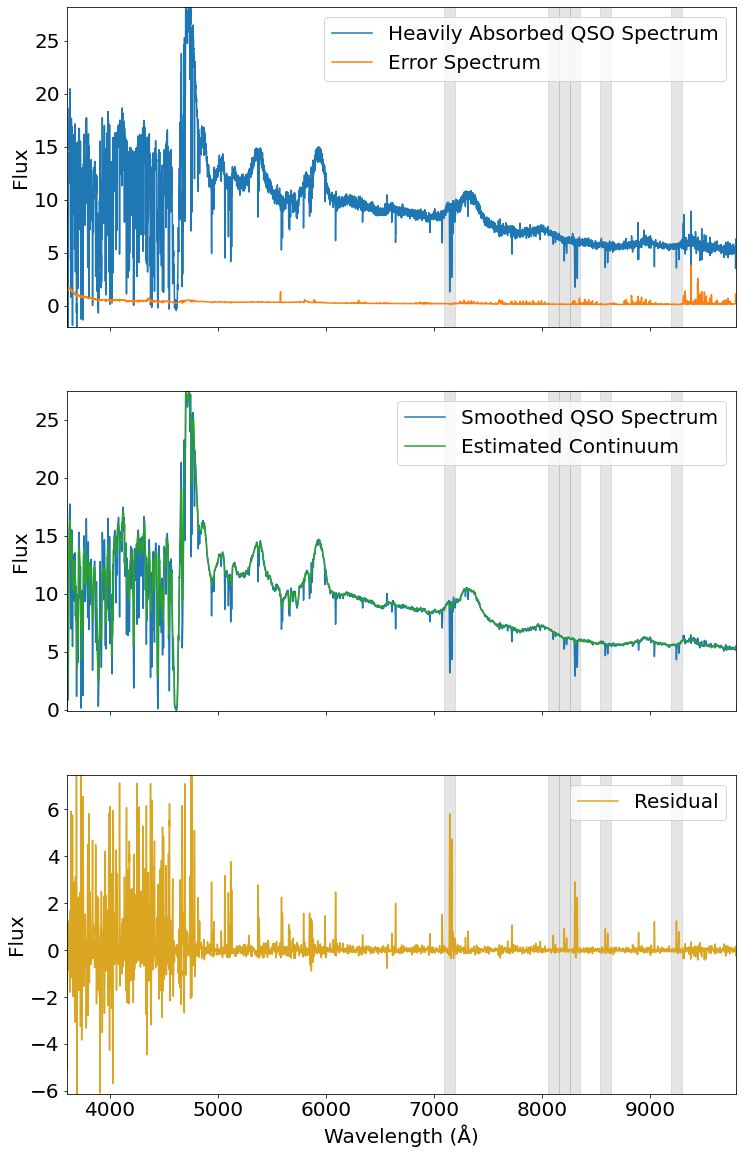

In [24]:
plt.rcParams.update({'font.size': 20})

#Cell to creat the 6abs plot in paper, don't delete again you dummy
kernel_smooth = 2
kernel = Gaussian1DKernel(stddev = kernel_smooth)

med_filt_size_tight = 19
med_filt_size_wide = 39

#TID = 39627776285740167
MgII_cat_inds = np.where(MgII_cat['TARGETID'] == 39627776285740167)[0]

fi = MgII_cat_inds[0]

hp = radec2pix(64,MgII_cat['RA'][fi],MgII_cat['DEC'][fi])

z_abs = MgII_cat['Z_MGII'][MgII_cat_inds]

spec = get_spec_healpix(MgII_cat['TARGETID'][fi],hp,MgII_cat['SURVEY'][fi],'fuji')

x_spc = spec.wave['brz']
y_flx = spec.flux['brz'][0]
y_err = 1/np.sqrt(spec.ivar['brz'][0])

#apply gaussian smoothing kernel
smooth_yflx = convolve(y_flx,kernel)

c_tight = medfilt(y_flx,med_filt_size_tight)
c_wide = medfilt(y_flx,med_filt_size_wide)
#length of filter scale for normalizing
f_scale = len(c_tight)
#weight tight filter higher at low z and wide filter higher at high z
cont_est = c_tight*(1-np.arange(f_scale )/f_scale) + c_wide*(np.arange(f_scale )/f_scale)

f, (ax0, ax1, ax2) = plt.subplots(3,1,sharex=True,figsize=(12,20))

ax0.plot(x_spc,y_flx,label = 'Heavily Absorbed QSO Spectrum')
ax0.plot(x_spc,y_err,label = 'Error Spectrum')
for z in z_abs:
    ax0.fill_betweenx([-100,100], first_line_wave*(1+float(z))-50, x2=second_line_wave*(1+float(z))+30, alpha=0.2, color='gray')

ax0.set_xlim(3600,9800)
ax0.set_ylim(np.percentile(y_flx,0.01),np.percentile(y_flx,99.9))
ax0.set_ylabel('Flux')
ax0.legend()

ax1.plot(x_spc,smooth_yflx,label = 'Smoothed QSO Spectrum')
ax1.plot(x_spc,cont_est, label = 'Estimated Continuum',c='C02')
for z in z_abs:
    ax1.fill_betweenx([-100,100], first_line_wave*(1+float(z))-50, x2=second_line_wave*(1+float(z))+30, alpha=0.2, color='gray')

ax1.set_xlim(3600,9800)
ax1.set_ylim(np.percentile(smooth_yflx,0.01),np.percentile(smooth_yflx,99.9))
ax1.set_ylabel('Flux')
ax1.legend()

ax2.plot(x_spc,cont_est-smooth_yflx, label = 'Residual',c='goldenrod')
for z in z_abs:
    ax2.fill_betweenx([-100,100], first_line_wave*(1+float(z))-50, x2=second_line_wave*(1+float(z))+30, alpha=0.2, color='gray')

ax2.set_xlim(3600,9800)
ax2.set_ylim(np.percentile(cont_est-smooth_yflx,0.01),np.percentile(cont_est-smooth_yflx,99.9))
ax2.set_xlabel('Wavelength (Å)')
ax2.set_ylabel('Flux')
ax2.legend()

plt.show()